# Gradient Descent and Backpropagation
### Understanding the math behind gradient descent and how to implement backprogagation in python
--------------------
**Author: Jay Mody**

**Required Knowledge:**
- Basic Python Skills
- Numpy
- Calculus (derivatives, gradients, chain rule)
- Linear Algebra (matrices, matrix multiplication)

## Data

In [1]:
#### Imports ####
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs


#### Data Parameters ####
n_features = 2  # n_input_nodes
n_classes = 4 # n_output_nodes

n_training_samples = 300 
n_testing_samples = 200

cluster_std = 0.5
center_box = (-10, 10)

colors_list = ['red', 'cyan', 'magenta', 'green', 'black', 'blue']
colors = ListedColormap(colors_list)

seed = 1


#### Training Data ####
x_train, y_train_raw = make_blobs(n_samples = n_training_samples, 
                                  n_features = n_features,
                                  centers = n_classes,
                                  center_box = center_box,
                                  cluster_std =  cluster_std, 
                                  random_state = seed)

# One-hot encodes the y values (categorically encoding the data)
y_train = np.zeros((y_train_raw.shape[0], n_classes))
y_train[np.arange(y_train_raw.size), y_train_raw] = 1

#### Testing Data ####
x_test, y_test = make_blobs(n_samples = n_testing_samples + n_training_samples, 
                            n_features = n_features,
                            centers = n_classes,
                            center_box = center_box,
                            cluster_std =  cluster_std, 
                            random_state = seed)
x_test = x_test[-n_testing_samples:]
y_test = y_test[-n_testing_samples:]

### Training Dataset

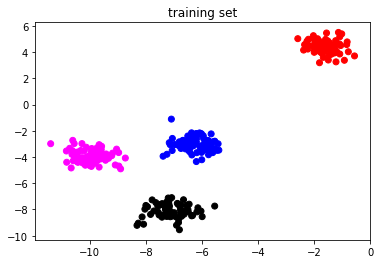

In [2]:
plt.scatter(x_train[:, 0], x_train[:, 1], c = y_train_raw, cmap = colors)
plt.title('training set')
plt.show()

### Testing Dataset

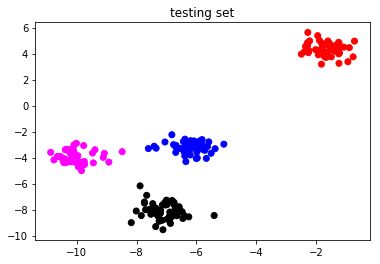

In [3]:
# Show the data
plt.scatter(x_test[:, 0], x_test[:, 1], c = y_test, cmap = colors)
plt.title('testing set')
plt.show()

## Neural Network

In [7]:
#### Neural Network Class ####
class NeuralNetwork:
    ##### Constructor ####
    def __init__(self, n_input_nodes, n_hidden_nodes, n_output_nodes, lr):
        ## Network ##
        self.n_input_nodes = n_input_nodes
        self.n_hidden_nodes = n_hidden_nodes
        self.n_output_nodes = n_output_nodes
        
        ## Weights ##
        # Weights are typical initialized using a some kind of distribution (random uniform, normal)
        # Here im going to use a normal distribution with a standard deviation of 1
        self.weights_i_h = np.random.normal(0.0, 1.0, (self.n_input_nodes, self.n_hidden_nodes))
        self.weights_h_o = np.random.normal(0.0, 1.0, (self.n_hidden_nodes, self.n_output_nodes))
        
        ## Learning Rate ##
        self.lr = lr
        
        ## Activation Functions ##
        # Relu Activation
        self.relu = lambda x: x if x > 0 else 0
        self.d_relu = lambda x: 1 if x > 0 else 0
            
        # Sigmoid Activation
        self.sigmoid = lambda x: 1 / (1 + np.exp(-x))
        self.d_sigmoid = lambda x: x * (1 - x)  # assuming sigmoid has already applied to x
    
    def feed_forward(self, X):
        # Hidden Layer
        hidden_input = np.dot(X, self.weights_i_h)
        hidden_outputs = self.relu(hidden_inputs)
        
        # Output Layer
        y_hat_raw = np.dot(hidden_outputs, self.weights_h_o)
        y_hat = self.sigmoid(y_hat_raw)
    
        return hidden_outputs, y_hat
    
    def backpropagation(self, X, y, y_hat, hidden_outputs):
        # Output Layer
        d1 = y - y_hat
        d2 = self.d_sigmoid(hidden_outputs)
        output_error = d1 * d2
        
        # Hidden Layer
        d3 = self.weights_h_o
        d4 = self.d_relu(X)
        hidden_error = output_error * d3 * d4
        
        # Gradients
        output_grad = output_error * hidden_ouputs
        hidden_grad = hidden_error * X
        
        return hidden_grad, output_grad
    
    def train(self, features, targets):
        # Batch Size for weight update step
        batch_size = features.shape[0]
        
        # Delta Weights Variables
        delta_weights_i_h = np.zeros(self.weights_i_h.shape)
        delta_weights_h_o = np.zeros(self.weights_h_o.shape)
        
        # For every data point, forward pass, backpropogation, store weights change
        for X, y in zip(features, targets):
            # Forward pass
            hidden_outputs, y_hat = self.feed_forward(X)
            
            # Back propogation
            hidden_grad, output_grad = self.backpropagation(X, y, y_hat, hidden_outputs)
            
            # Weights
            delta_weights_i_h += hidden_grad
            delta_weights_h_o += output_grad
        
        # Update Weights
        self.weights_i_h += (self.lr * delta_weights_i_h) / batch_size
        self.weights_h_o += (self.lr * delta_weights_h_o) / batch_size  

## Training